### 작업공간 불러오기, 자료 ```attach```하기

In [18]:
load("C:/Users/eunee/khu_sda_project/data_cleaning.RData")

시각화를 위한 ```ggplot2``` 설치

In [19]:
install.packages("ggplot2")
library("ggplot2")

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'를 열 수 없습니다"Warning message:
"package 'ggplot2' is in use and will not be installed"

In [20]:
summary(nrdt_attach)

      pid               wstart         wspacesat         wtime         gend    
 Min.   :     102   Min.   : 0.000   Min.   :1.000   Min.   : 0.3333   0:2896  
 1st Qu.:  193353   1st Qu.: 8.000   1st Qu.:3.000   1st Qu.: 9.0000   1:1999  
 Median :  353305   Median : 9.000   Median :3.000   Median : 9.0000           
 Mean   : 1870222   Mean   : 9.045   Mean   :3.308   Mean   : 9.5753           
 3rd Qu.:  596852   3rd Qu.: 9.000   3rd Qu.:4.000   3rd Qu.:10.0000           
 Max.   :11014502   Max.   :23.000   Max.   :5.000   Max.   :24.0000           
      age       comp_type educ     jobty        lnwage     
 Min.   :18.0   0:4232    0: 666   0:3665   Min.   :2.304  
 1st Qu.:35.0   1: 663    1:1641   1: 813   1st Qu.:4.942  
 Median :42.0             2: 931   2: 417   Median :5.298  
 Mean   :43.6             3:1375            Mean   :5.295  
 3rd Qu.:52.0             4: 282            3rd Qu.:5.704  
 Max.   :80.0                               Max.   :8.294  

## 난수를 넣어 산포도 보기

In [28]:
set.seed(38365)
nrdt_attach$wspacesat_jit <- nrdt_attach$wspacesat+rnorm(length(nrdt_attach$wspacesat))

In [27]:
attach(nrdt_attach)

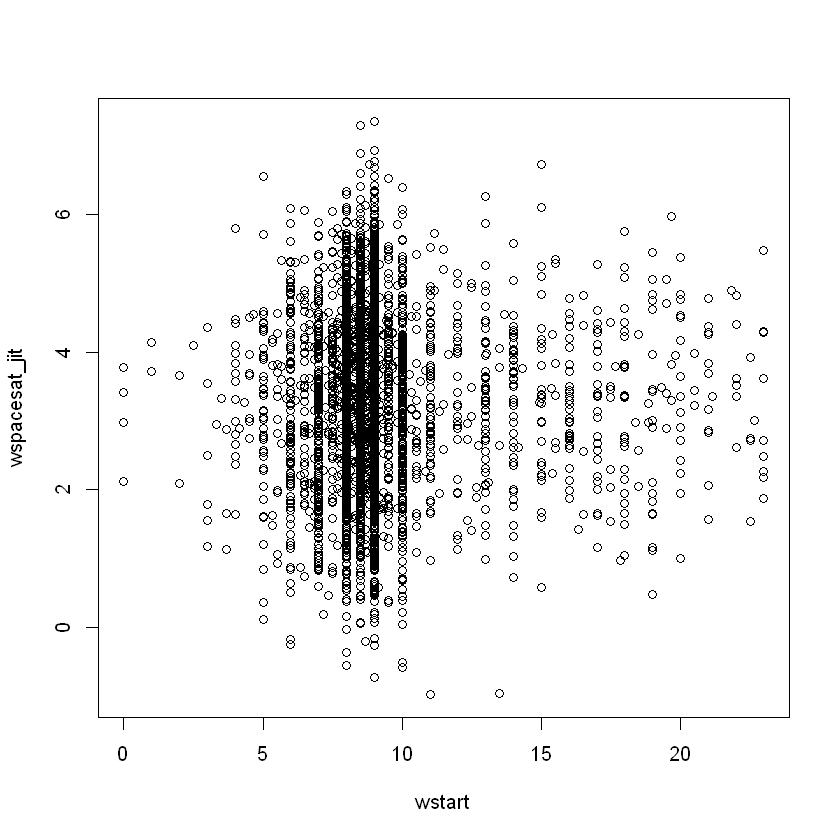

In [30]:
fit3 <- lm(wspacesat ~ factor(wtime) + factor(gend) + age + factor(educ) + wtime + lnwage + factor(jobty) + factor(comp_type))
plot(wstart, wspacesat_jit)

## 기초 통계

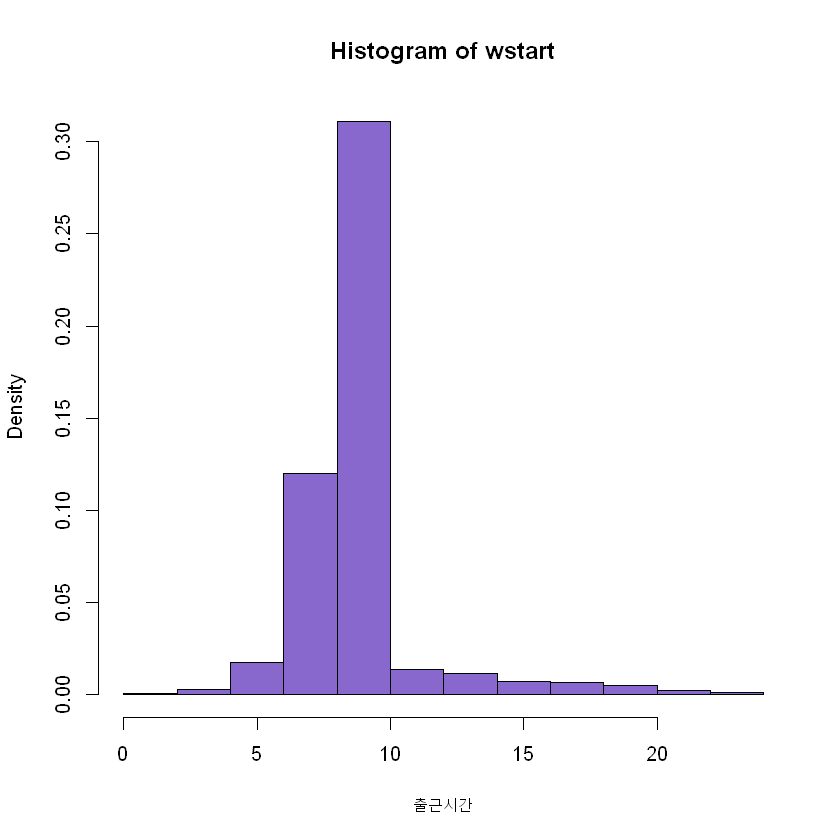

In [56]:
hist(wstart, freq = F, ylab="Density", xlab="출근시간", col="mediumpurple3")

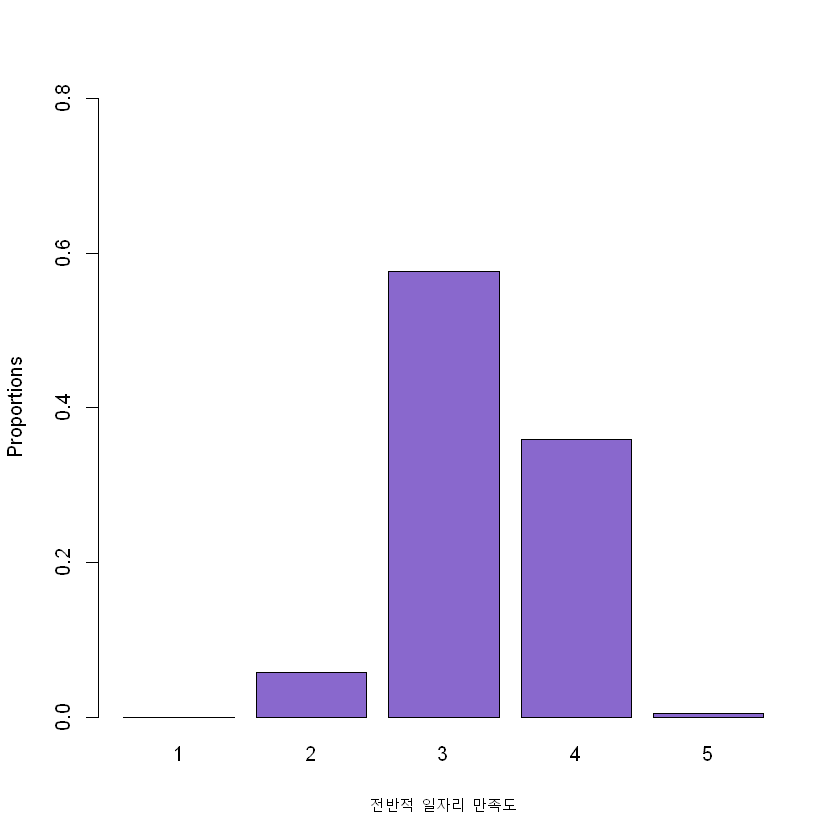

In [51]:
barplot(prop.table(table(wspacesat)), ylim=c(0, 0.8), col="mediumpurple3",
        xlab="전반적 일자리 만족도", ylab="Proportions")

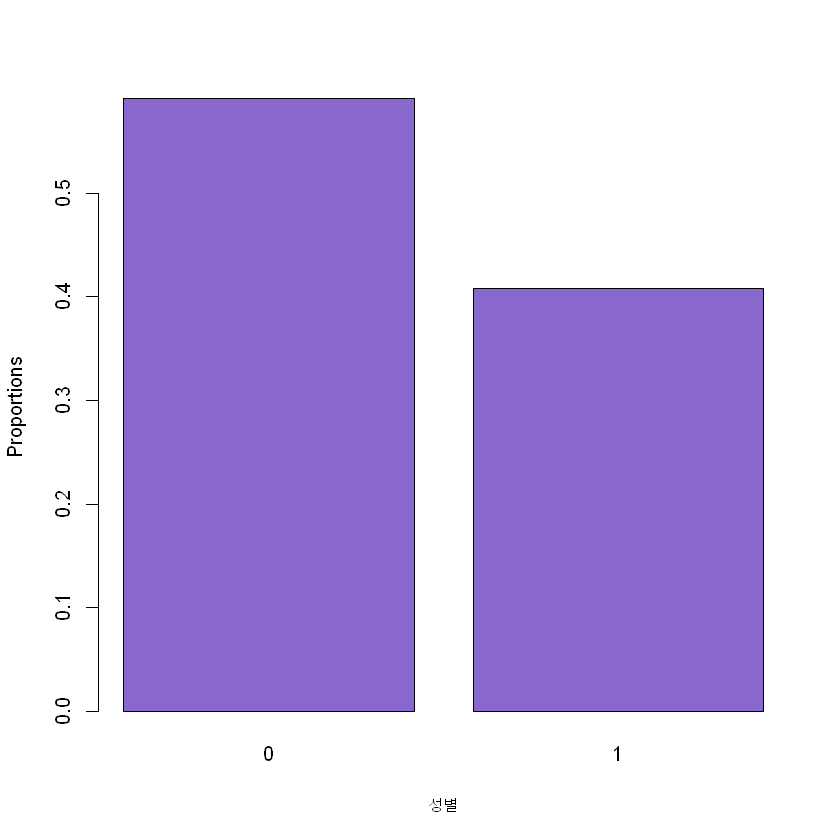

In [55]:
barplot(prop.table(table(gend)), col="mediumpurple3",
        xlab="성별", ylab="Proportions")

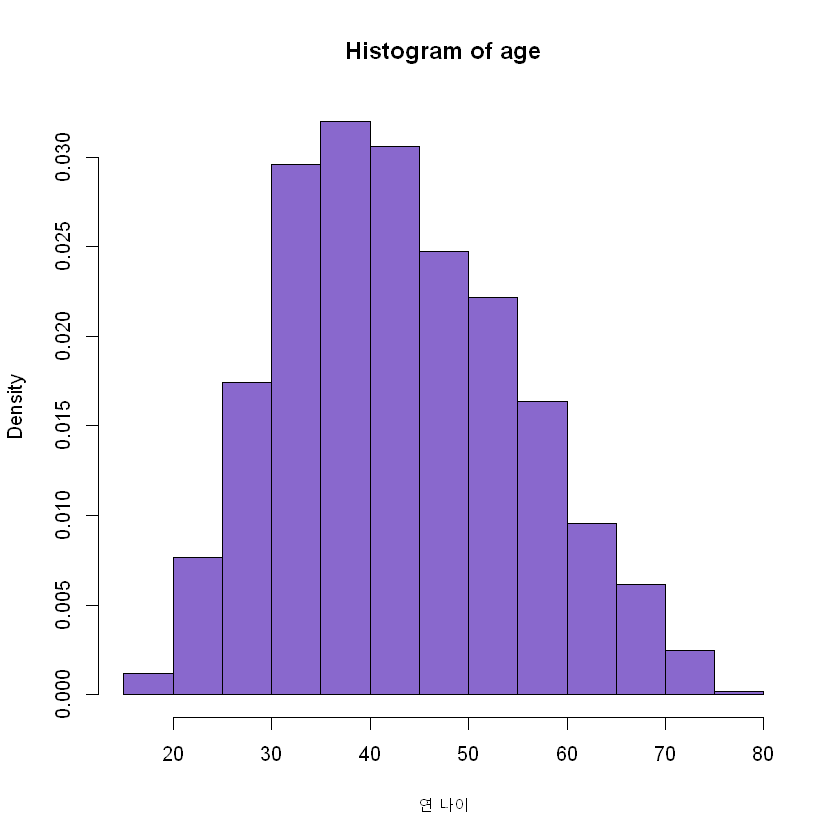

In [54]:
hist(age, freq = F, ylab="Density", xlab="연 나이", col="mediumpurple3")

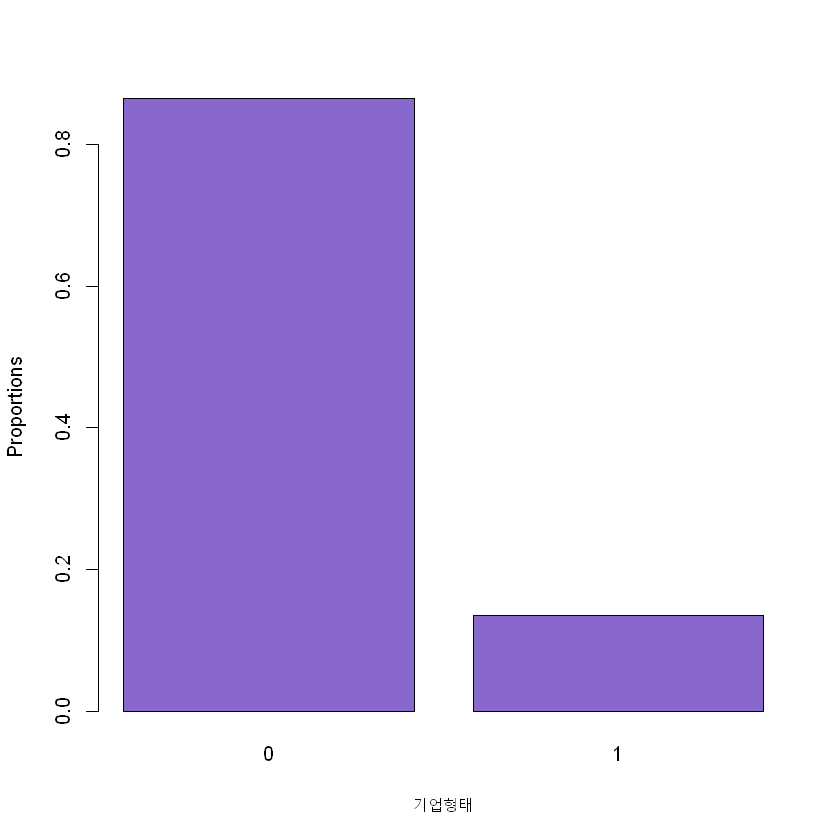

In [53]:
barplot(prop.table(table(comp_type)), col="mediumpurple3",
        xlab="기업형태", ylab="Proportions")

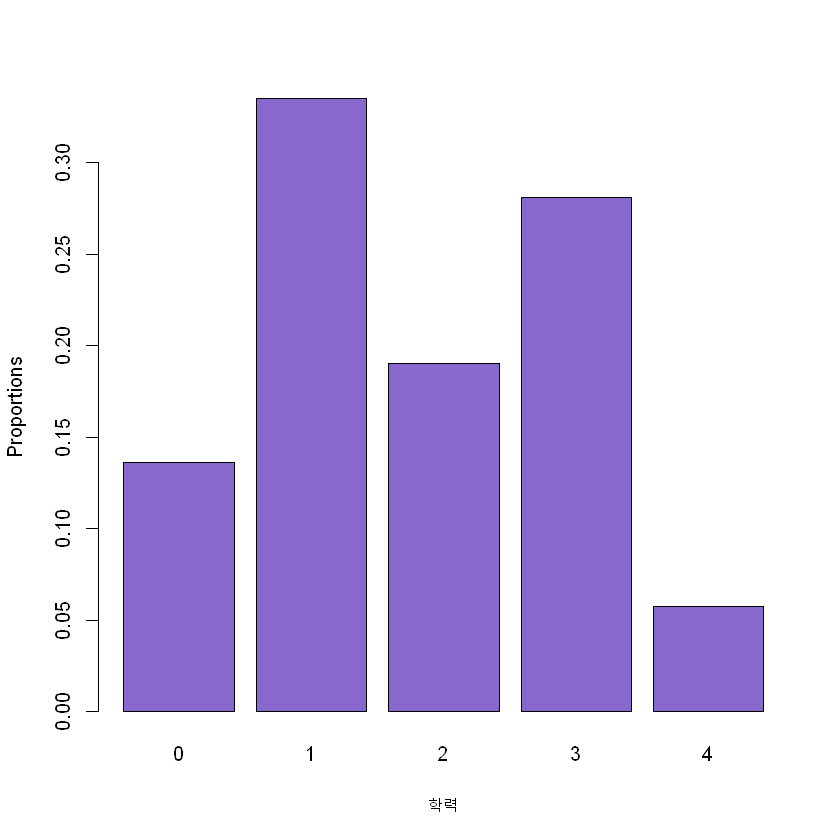

In [52]:
barplot(prop.table(table(educ)), col="mediumpurple3",
        xlab="학력", ylab="Proportions")

## 기술통계 및 회귀분석 1

In [50]:
summary(lm(wspacesat ~ wstart))


Call:
lm(formula = wspacesat ~ wstart)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3092 -0.3089 -0.3085  0.6911  1.6972 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.3149746  0.0327779 101.135   <2e-16 ***
wstart      -0.0007182  0.0035031  -0.205    0.838    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.587 on 4893 degrees of freedom
Multiple R-squared:  8.591e-06,	Adjusted R-squared:  -0.0001958 
F-statistic: 0.04204 on 1 and 4893 DF,  p-value: 0.8376


In [58]:
summary(lm(wspacesat ~ wstart + lnwage + factor(gend) + factor(jobty) + factor(comp_type) + factor(educ)))


Call:
lm(formula = wspacesat ~ wstart + lnwage + factor(gend) + factor(jobty) + 
    factor(comp_type) + factor(educ))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2752 -0.3242 -0.1526  0.4982  2.2081 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.014878   0.096709  20.834  < 2e-16 ***
wstart              0.004964   0.003307   1.501  0.13337    
lnwage              0.215147   0.016428  13.096  < 2e-16 ***
factor(gend)1       0.152437   0.017769   8.579  < 2e-16 ***
factor(jobty)1     -0.064778   0.023582  -2.747  0.00604 ** 
factor(jobty)2     -0.261753   0.030848  -8.485  < 2e-16 ***
factor(comp_type)1  0.267660   0.023202  11.536  < 2e-16 ***
factor(educ)1      -0.009827   0.025862  -0.380  0.70399    
factor(educ)2       0.041012   0.029699   1.381  0.16736    
factor(educ)3       0.088049   0.028683   3.070  0.00215 ** 
factor(educ)4       0.255861   0.041908   6.105 1.11e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 

## 기술통계 및 회귀분석 2

In [59]:
summary(lm(wspacesat ~ poly(wstart,2)))


Call:
lm(formula = wspacesat ~ poly(wstart, 2))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3547 -0.3249 -0.3029  0.6751  1.8138 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.308478   0.008372 395.183  < 2e-16 ***
poly(wstart, 2)1 -0.120361   0.585742  -0.205    0.837    
poly(wstart, 2)2 -2.786997   0.585742  -4.758 2.01e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5857 on 4892 degrees of freedom
Multiple R-squared:  0.004615,	Adjusted R-squared:  0.004208 
F-statistic: 11.34 on 2 and 4892 DF,  p-value: 1.22e-05


## 기술통계 및 회귀분석 3

In [60]:
summary(lm(wspacesat ~ poly(wstart, 2) + factor(gend) + factor(jobty) + factor(comp_type) + educ))


Call:
lm(formula = wspacesat ~ poly(wstart, 2) + factor(gend) + factor(jobty) + 
    factor(comp_type) + educ)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2984 -0.3317 -0.1683  0.5558  2.1081 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         3.19610    0.02612 122.369  < 2e-16 ***
poly(wstart, 2)1    0.17074    0.56130   0.304  0.76100    
poly(wstart, 2)2   -0.98567    0.56466  -1.746  0.08094 .  
factor(gend)1       0.05540    0.01690   3.278  0.00105 ** 
factor(jobty)1     -0.17492    0.02244  -7.796 7.74e-15 ***
factor(jobty)2     -0.36539    0.03031 -12.054  < 2e-16 ***
factor(comp_type)1  0.27078    0.02360  11.471  < 2e-16 ***
educ1               0.04541    0.02598   1.748  0.08054 .  
educ2               0.11588    0.02969   3.902 9.66e-05 ***
educ3               0.18694    0.02822   6.625 3.85e-11 ***
educ4               0.40769    0.04102   9.940  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.

In [61]:
summary(lm(wspacesat ~ poly(wstart, 2) + lnwage + factor(gend) + factor(jobty) + factor(comp_type) + educ))


Call:
lm(formula = wspacesat ~ poly(wstart, 2) + lnwage + factor(gend) + 
    factor(jobty) + factor(comp_type) + educ)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2690 -0.3231 -0.1465  0.4984  2.1987 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.06031    0.08989  22.920  < 2e-16 ***
poly(wstart, 2)1    0.87893    0.55423   1.586  0.11284    
poly(wstart, 2)2   -1.28020    0.55538  -2.305  0.02120 *  
lnwage              0.21667    0.01643  13.184  < 2e-16 ***
factor(gend)1       0.14605    0.01798   8.125 5.63e-16 ***
factor(jobty)1     -0.06501    0.02357  -2.758  0.00584 ** 
factor(jobty)2     -0.26001    0.03084  -8.430  < 2e-16 ***
factor(comp_type)1  0.26614    0.02320  11.471  < 2e-16 ***
educ1              -0.01464    0.02594  -0.565  0.57233    
educ2               0.03418    0.02983   1.146  0.25193    
educ3               0.07969    0.02890   2.757  0.00585 ** 
educ4               0.24493    0.04216   5.810 6.6

In [62]:
fit3 <- lm(wspacesat ~ poly(wstart,2) +  factor(gend) + age +
             factor(jobty)+factor(comp_type) + factor(educ))

fit4 <- lm(wspacesat ~ poly(wstart,2) + lnwage + factor(gend) + age +
             factor(jobty)+factor(comp_type) + factor(educ))


anova(fit3, fit4)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
4883,1474.712,NA,NA,NA,NA
4882,1424.359,1,50.3525,172.5835,9.112789e-39


## 기술통계 및 회귀분석 4

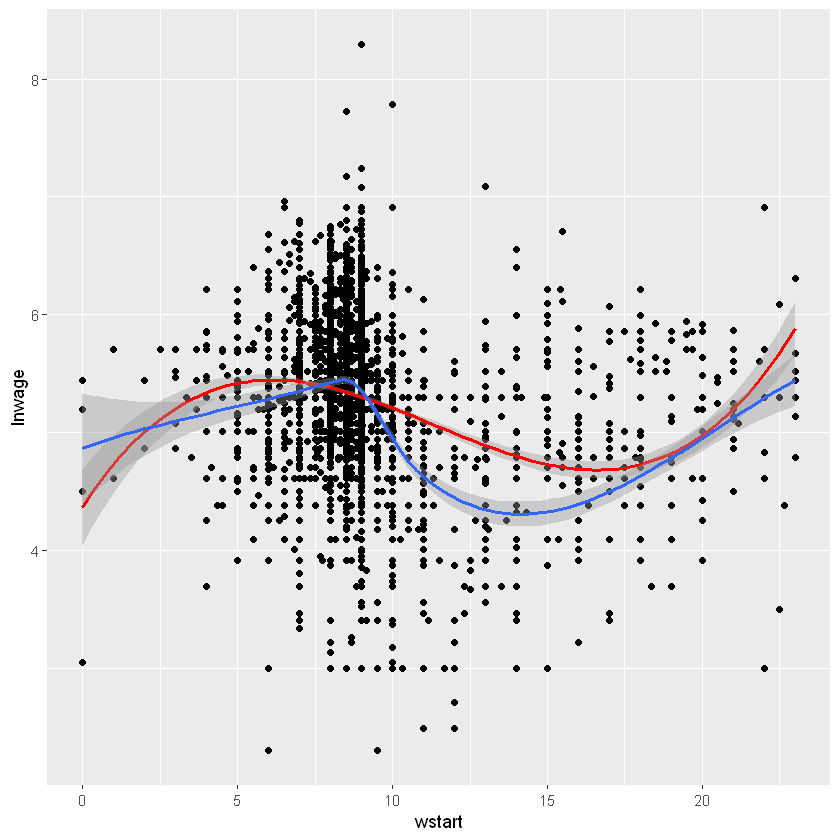

In [63]:
ggplot(nrdt_attach, aes(wstart, lnwage))+ geom_point() +geom_smooth(method = "lm", formula = y ~ poly(x,3), color = "red")+ geom_smooth(method = "loess")